# AED - Proyecto III

**Autores:**
- Leopoldo Muñoz
- Valentina Yáñez

---

In [78]:
# Configuración inicial
import warnings
warnings.filterwarnings('ignore')

# Configurar pandas para mostrar más columnas y filas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Configurar matplotlib para mejores gráficos
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

import nbconvert



In [79]:
# Cargar el dataset desde .data/online_shoppers_intention.csv
df = pd.read_csv('data/online_shoppers_intention.csv')

# Verificar variables categóricas del dataset
print("\nOtras variables categóricas existentes:")
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Variables categóricas: {categorical_cols}")

# Convertir Month y VisitorType de object a categorical
if 'Month' in df.columns:
    df['Month'] = df['Month'].astype('category')
if 'VisitorType' in df.columns:
    df['VisitorType'] = df['VisitorType'].astype('category')

# Mostrar las primeras filas del dataset
df.head()


Otras variables categóricas existentes:
Variables categóricas: ['Month', 'VisitorType', 'Weekend', 'Revenue']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Contexto

La información utilizada en este proyecto proviene del UCI Machine Learning Repository y fue recopilada en el año 2018. El objetivo principal del dataset es predecir la intención de compra de los usuarios durante sus sesiones de navegación en una tienda en línea. Los datos se recolectaron en tiempo real mediante analítica web (Google Analytics) y se respetó que cada fila represente un usuario diferente, evitando la dependencia temporal entre sesiones.

El conjunto de datos contiene 12,330 registros, cada uno representando una sesión única de usuario. Presenta un balance de clases donde el 84.5% de las sesiones no terminan en compra y el 15.5% sí lo hacen. El período de observación abarca un año completo, lo que permite evitar sesgos relacionados con campañas o eventos específicos.

Se considera útil para aplicar técnicas de clasificación, detección de outliers y clustering no supervisado.

## Estructura general

| Tipo             | Cantidad                |
|------------------|------------------------|
| Instancias       | 12,330                 |
| Atributos        | 18                     |
| Atributo clase   | 1 (Revenue)            |
| Tipo de datos    | Mixto (numérico y categórico) |
| Valores faltantes| No                     |


## Atributos

| Atributo                  | Tipo        | Descripción                                                                                   |
|---------------------------|-------------|-----------------------------------------------------------------------------------------------|
| Administrative            | Entero      | N.º de páginas administrativas visitadas (como política de privacidad, contactos, etc.).      |
| Administrative_Duration   | Real        | Tiempo total (segundos) en páginas administrativas.                                           |
| Informational             | Entero      | N.º de páginas informativas (por ejemplo, ayuda o preguntas frecuentes).                      |
| Informational_Duration    | Real        | Tiempo total en páginas informativas.                                                         |
| ProductRelated            | Entero      | N.º de páginas de productos visitadas.                                                        |
| ProductRelated_Duration   | Real        | Tiempo total en páginas de productos.                                                         |
| BounceRates               | Real        | Porcentaje de usuarios que abandonan el sitio tras visitar solo una página.                   |
| ExitRates                 | Real        | Porcentaje de veces que una página fue la última visitada en la sesión.                       |
| PageValues                | Real        | Valor promedio de las páginas visitadas antes de una conversión.                              |
| SpecialDay                | Real        | Proximidad a fechas especiales (por ejemplo, Día de San Valentín), valores de 0 a 1.          |
| Month                     | Categórico  | Mes de la visita (por ejemplo, "Feb", "Mar").                                                 |
| OperatingSystems          | Entero  | Sistema operativo utilizado.                                                                  |
| Browser                   | Entero  | Navegador web utilizado.                                                                      |
| Region                    | Entero  | Región geográfica del usuario.                                                                |
| TrafficType               | Entero  | Tipo de tráfico de la sesión (directo, referido, etc.).                                       |
| VisitorType               | Categórico  | Visitante nuevo, recurrente u otro.                                                           |
| Weekend                   | Booleano    | Si la visita fue durante el fin de semana (TRUE o FALSE).                                     |
| Revenue                   | Booleano    | Variable objetivo. Si la sesión terminó en compra (TRUE) o no (FALSE).                        |

**Observaciones:**

- Como el dataset trae una característica objetivo, esta se debería eliminar para un entrenamiento no supervisado, pero puede ser útil más adelante para contrastar resultados.
- Las características enteras `OperatingSystems`, `Browser`, `Region` y `TrafficType` representan en realidad enumeraciones categóricas, por lo que se debe decidir una manera de transformarlas, interpretarlas o incluso eliminarlas.


## Exploración de los datos

In [80]:
# Verificar información básica del dataset
print("Información del dataset:")
print(f"Forma: {df.shape}")
print(f"Tipos de datos originales:")
print(df.dtypes)


Información del dataset:
Forma: (12330, 18)
Tipos de datos originales:
Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object


In [81]:
# Verificar que no haya valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [82]:
# Información de las columnas
print("Información de las columnas:")
print(df.info())

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  int64   
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 n

A continuación, se declaran las variables categóricas enumeradas como categóricas, pues son leídas automáticamente con el tipo entero.

In [83]:
# Convertir variables enteras categóricas a tipo categorical (equivalente a factor en R)
categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in categorical_features:
    # Mostrar valores únicos antes de la conversión
    print(f"\n{feature}:")
    print(f"  - Valores únicos: {df[feature].nunique()}")
    print(f"  - Rango: {df[feature].min()} - {df[feature].max()}")
    
    # Convertir a categorical
    df[feature] = df[feature].astype('category')

print("Variables categóricas convertidas:")
print(df[categorical_features].dtypes)



OperatingSystems:
  - Valores únicos: 8
  - Rango: 1 - 8

Browser:
  - Valores únicos: 13
  - Rango: 1 - 13

Region:
  - Valores únicos: 9
  - Rango: 1 - 9

TrafficType:
  - Valores únicos: 20
  - Rango: 1 - 20
Variables categóricas convertidas:
OperatingSystems    category
Browser             category
Region              category
TrafficType         category
dtype: object


In [84]:
print(f"\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object


In [85]:
# Estadísticas descriptivas solo para variables numéricas
print("\nEstadísticas descriptivas (numéricas):")
print(df.describe(include=[np.number]))



Estadísticas descriptivas (numéricas):
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25% 

In [86]:
#Estadísticas descriptivas para variables categóricas
print("\nEstadísticas descriptivas (categóricas):")
print(df.describe(include=['category']))



Estadísticas descriptivas (categóricas):
        Month  OperatingSystems  Browser  Region  TrafficType  \
count   12330             12330    12330   12330        12330   
unique     10                 8       13       9           20   
top       May                 2        2       1            2   
freq     3364              6601     7961    4780         3913   

              VisitorType  
count               12330  
unique                  3  
top     Returning_Visitor  
freq                10551  


## Manejo de datos faltantes y datos atípicos

- **Datos faltantes:** El dataset no presenta datos faltantes.
- **Datos atípicos:** Se realizará una observación sobre la presencia de datos atípicos por medio de diagramas de cajas, y se analizará su influencia por medio del estadístico de Cook.

### Visualización de datos atípicos

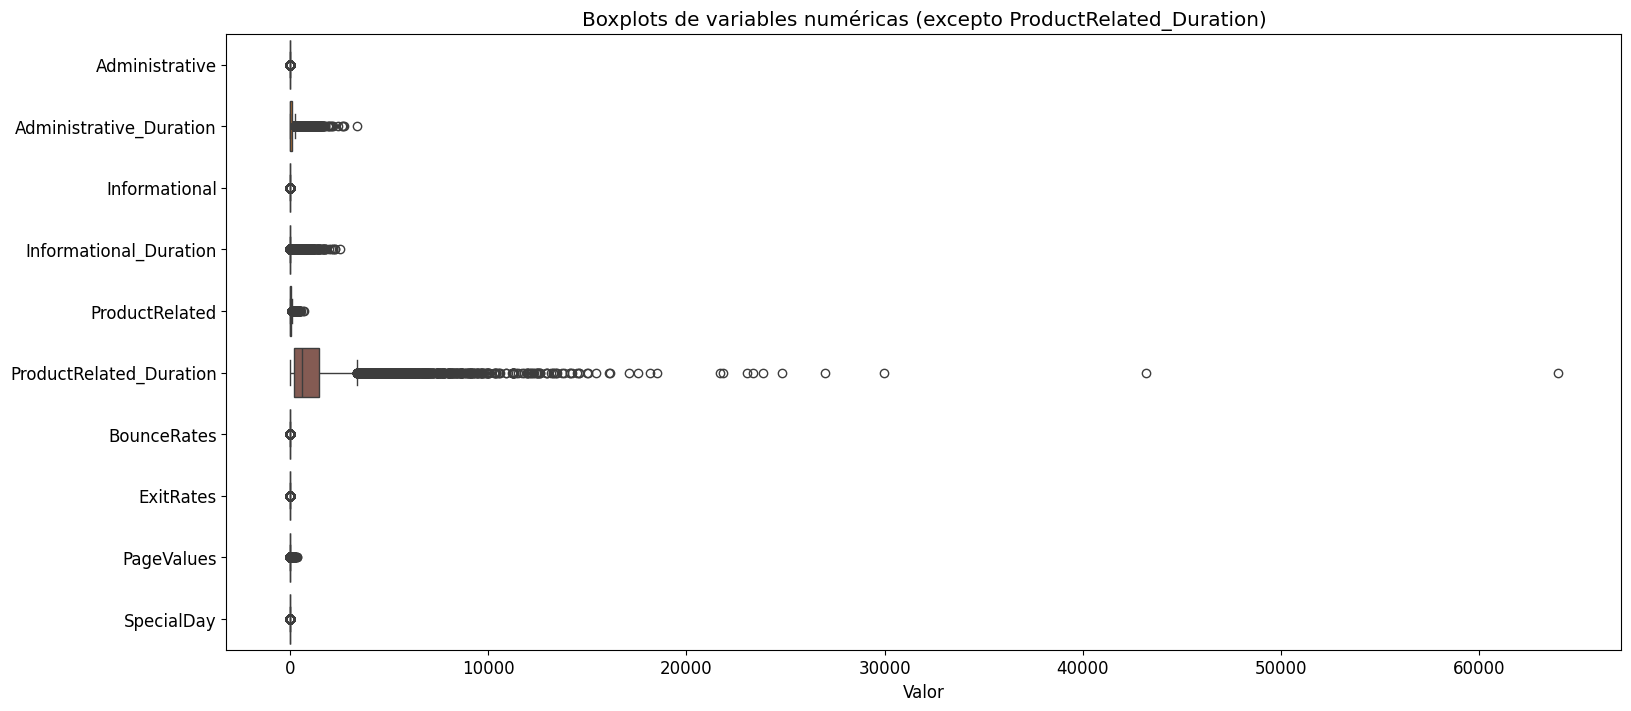

In [87]:
# Visualización de datos atípicos con boxplots

# Seleccionar solo las columnas numéricas para el boxplot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Boxplot de todas las variables numéricas
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplots de variables numéricas (excepto ProductRelated_Duration)')
plt.xlabel('Valor')
plt.show()


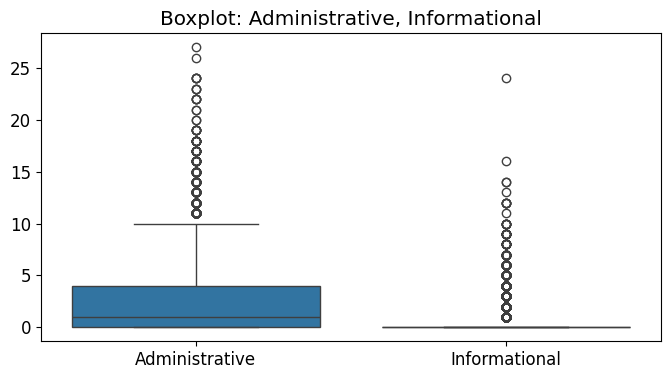

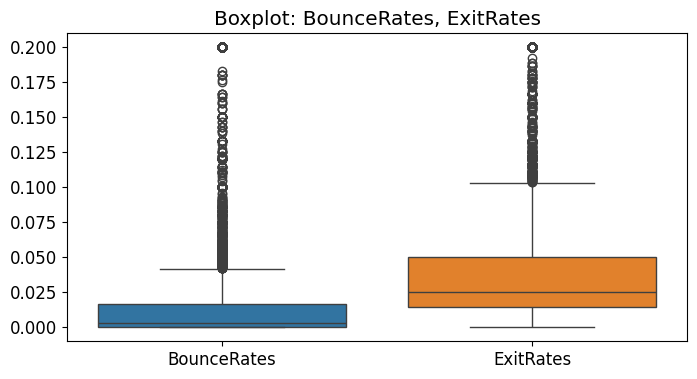

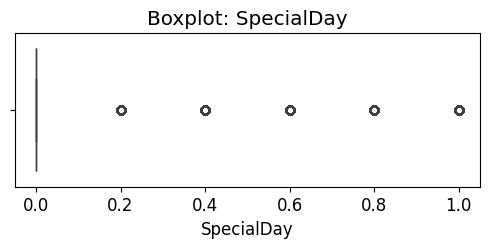

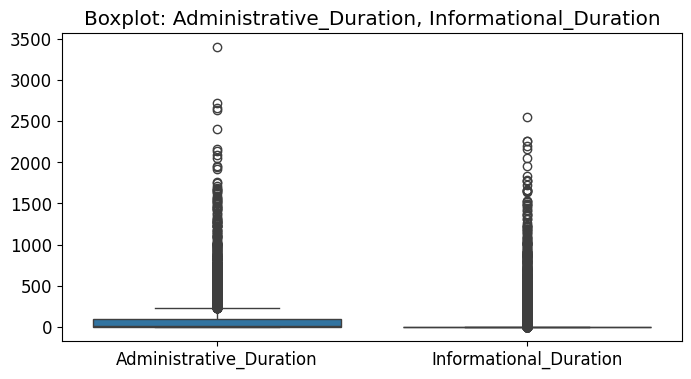

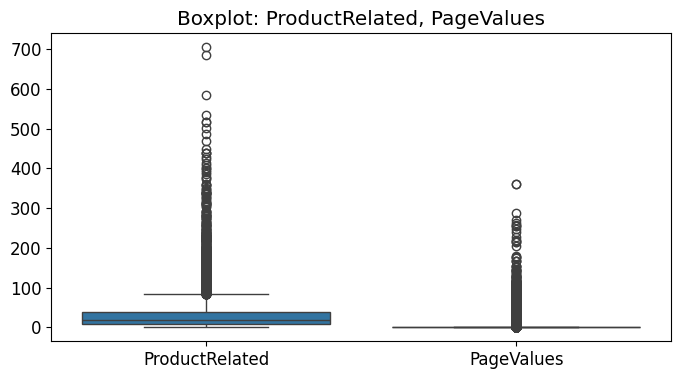

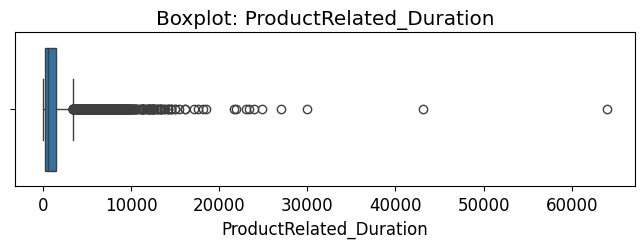

In [88]:
# 1. Boxplot para: Administrative, Informational
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Administrative', 'Informational']])
plt.title('Boxplot: Administrative, Informational')
plt.show()

# 2. Boxplot para: BounceRates, ExitRates
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['BounceRates', 'ExitRates']])
plt.title('Boxplot: BounceRates, ExitRates')
plt.show()

# 3. Boxplot para: SpecialDay
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['SpecialDay'])
plt.title('Boxplot: SpecialDay')
plt.show()

# 4. Boxplot para: Administrative_Duration, Informational_Duration
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Administrative_Duration', 'Informational_Duration']])
plt.title('Boxplot: Administrative_Duration, Informational_Duration')
plt.show()

# 5. Boxplot para: ProductRelated, PageValues
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['ProductRelated', 'PageValues']])
plt.title('Boxplot: ProductRelated, PageValues')
plt.show()

# 6. Boxplot para: ProductRelated_Duration
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['ProductRelated_Duration'])
plt.title('Boxplot: ProductRelated_Duration')
plt.show()


### Análisis con estadístico de Cook

In [89]:
# Análisis de observaciones influyentes usando el estadístico de Cook

influyentes_totales = []

for var in numeric_cols:
    # Definir variables predictoras (todas menos la variable objetivo y categóricas)
    X = df[numeric_cols].drop(columns=[var])
    y = df[var]

    # Ajustar modelo lineal
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Calcular leverage (h_ii)
    X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X.values])
    hat_matrix = X_with_intercept @ np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T
    leverage = np.diag(hat_matrix)

    # Calcular Cook's distance
    mse = np.mean(residuals**2)
    cooks_d = (residuals**2 / (len(X.columns) * mse)) * (leverage / (1 - leverage) ** 2)

    # Identificar observaciones influyentes
    threshold = 4 * np.mean(cooks_d)
    influential = np.where(cooks_d > threshold)[0]
    influyentes_totales.extend(influential)
    cantidad_influyentes = len(influential)
    porcentaje = cantidad_influyentes / len(y) * 100
    print(f"Variable objetivo: {var} - Observaciones influyentes: {cantidad_influyentes} ({porcentaje:.2f}%)")

# Calcular observaciones únicas y muy influyentes
influyentes_totales = np.array(influyentes_totales)
unicos = np.unique(influyentes_totales)
conteos = np.bincount(influyentes_totales)
muy_influyentes = np.sum(conteos > 1) # Observaciones con más de una influencia

print(f"\nCantidad de observaciones únicas influyentes: {len(unicos)} ({len(unicos) / len(df) * 100:.2f}%)")
print(f"Cantidad de observaciones muy influyentes: {muy_influyentes} ({muy_influyentes / len(df) * 100:.2f}%)")



Variable objetivo: Administrative - Observaciones influyentes: 213 (1.73%)
Variable objetivo: Administrative_Duration - Observaciones influyentes: 144 (1.17%)
Variable objetivo: Informational - Observaciones influyentes: 169 (1.37%)
Variable objetivo: Informational_Duration - Observaciones influyentes: 173 (1.40%)
Variable objetivo: ProductRelated - Observaciones influyentes: 72 (0.58%)
Variable objetivo: ProductRelated_Duration - Observaciones influyentes: 74 (0.60%)
Variable objetivo: BounceRates - Observaciones influyentes: 1151 (9.33%)
Variable objetivo: ExitRates - Observaciones influyentes: 505 (4.10%)
Variable objetivo: PageValues - Observaciones influyentes: 396 (3.21%)
Variable objetivo: SpecialDay - Observaciones influyentes: 629 (5.10%)

Cantidad de observaciones únicas influyentes: 2179 (17.67%)
Cantidad de observaciones muy influyentes: 716 (5.81%)


#### Conclusiones sobre el análisis

El análisis de observaciones influyentes muestra que la mayoría de las variables tienen un porccentaje bajo de observaciones influyentes, sin embargo, `BounceRates` y `SpecialDay` poseen una cantidad superior al 5%. Además, el total de observaciones **influyentes** es considerablemente significativo con un 17.67% y el de **muy influyentes**, aunque menor, sigue siendo significativo, con un porcentaje superior al 5%.

Considerando estos resultados, se puede concluir que:
- Dada la significativa presencia de variables influyentes, éstas pueden presentar mucha información útil, por la que se decide no descartarlas.
- La misma conclusión anterior se puede aplicar a las variables muy influyentes.
- Es sensato realizar un escalamiento robusto para las variables `BounceRates` y `SpecialDay`, debido a su mayor cantidad de observaciones influyentes.
- Se puede aplicar un escalamiento estandar al resto de las variables.

In [90]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# Seleccionar columnas para cada tipo de escalamiento
robust_cols = ['BounceRates', 'SpecialDay']
standard_cols = [col for col in numeric_cols if col not in robust_cols]

# Inicializar escaladores
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

# Crear copia de las columnas numéricas originales
scaled_df = df[numeric_cols].copy()
scaled_df[robust_cols] = robust_scaler.fit_transform(df[robust_cols])
scaled_df[standard_cols] = standard_scaler.fit_transform(df[standard_cols])

# Guardar el dataframe escalado en un archivo CSV
scaled_df.to_csv('data/scaled.csv', index=False)


### Variables categóricas a considerar

Se aplica One-Hot Encoding a las variables categóricas para poder utilizar esta información durante la clasificación de clusters.

Las variables como `OperativeSystem` o `Browser` no se consideran importantes para el estudio, por lo que se rescatan únicamente aquellas que se consideran más significativas. Las variables rescatadas son:
- `Month`
- `VisitorType`
- `Weekend`

In [91]:
# Realizar one-hot encoding para las variables 'Month', 'VisitorType' y 'Weekend'
one_hot = pd.get_dummies(df[['Month', 'VisitorType', 'Weekend']], drop_first=True)

# Concatenar al dataframe escalado
scaled_df = pd.concat([scaled_df, one_hot], axis=1)

# Mostrar las primeras filas para verificar
scaled_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,11.710742,3.229316,-0.317178,0.0,False,False,True,False,False,False,False,False,False,False,False,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.185128,1.171473,-0.317178,0.0,False,False,True,False,False,False,False,False,False,False,False,True
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,11.710742,3.229316,-0.317178,0.0,False,False,True,False,False,False,False,False,False,False,False,True
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,2.788840,1.994610,-0.317178,0.0,False,False,True,False,False,False,False,False,False,False,False,True
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,1.004459,0.142551,-0.317178,0.0,True,False,True,False,False,False,False,False,False,False,False,True


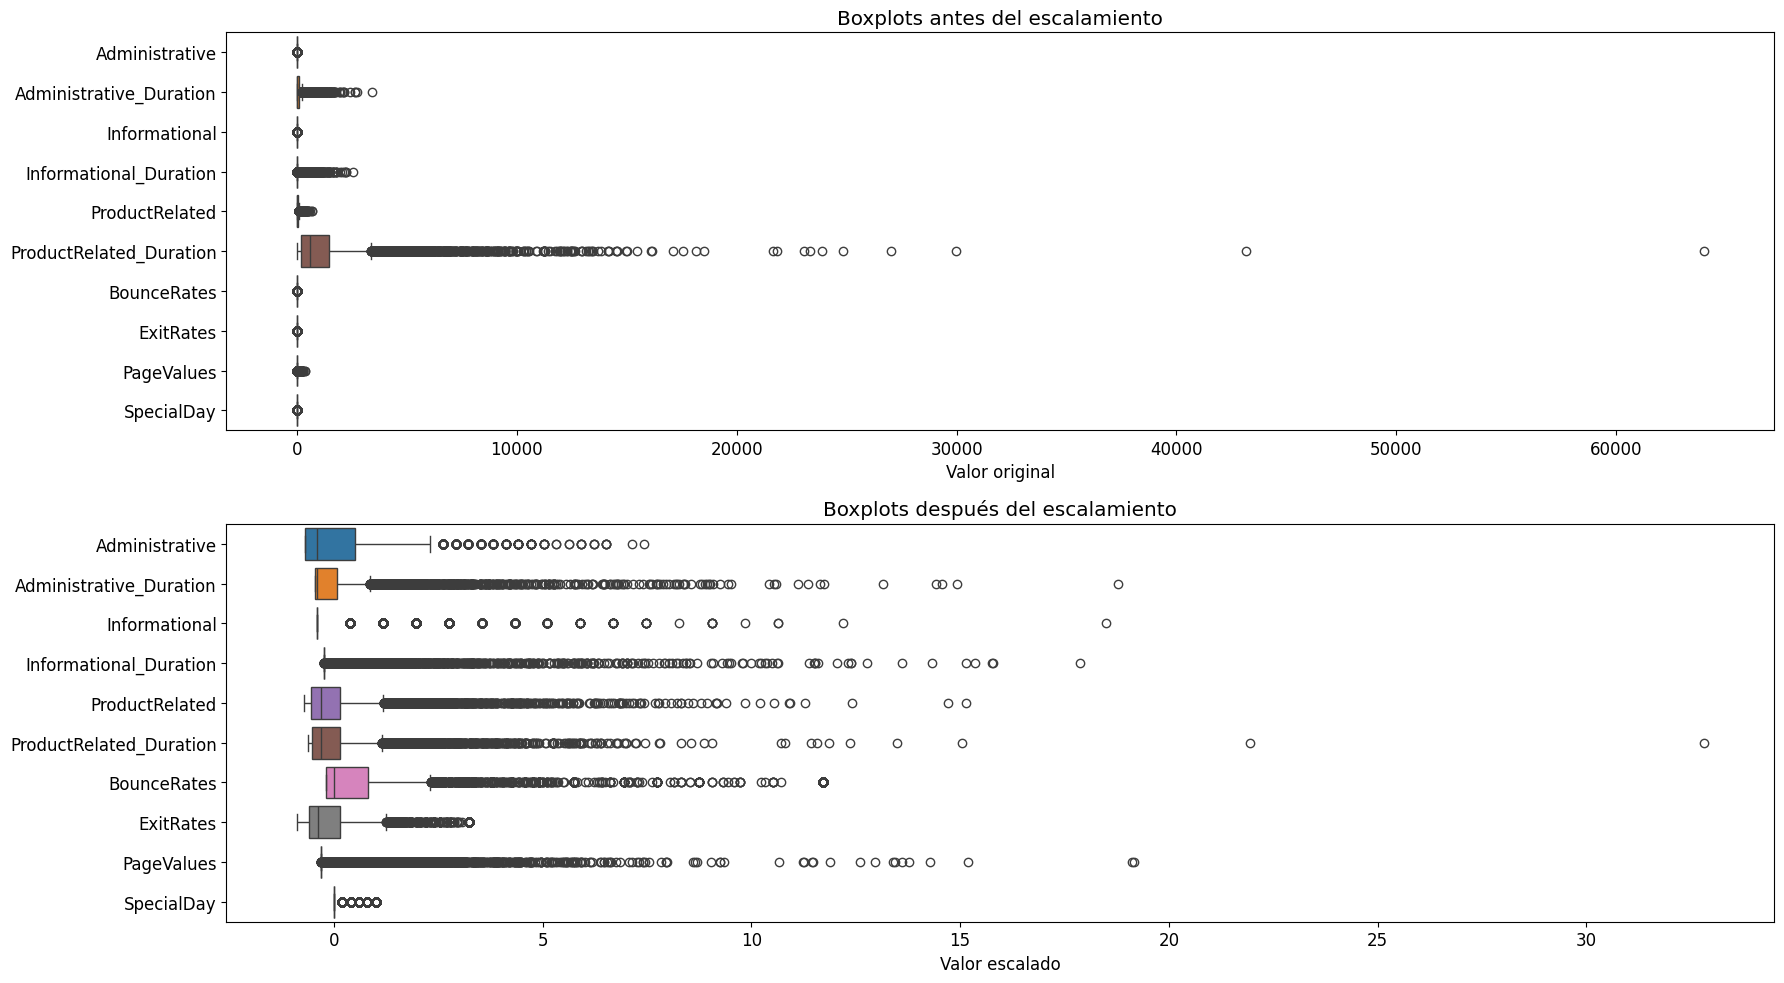

In [92]:
# Comparar antes y después con boxplots
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Antes del escalamiento
sns.boxplot(data=df[numeric_cols], orient='h', ax=axes[0])
axes[0].set_title('Boxplots antes del escalamiento')
axes[0].set_xlabel('Valor original')

# Después del escalamiento
sns.boxplot(data=scaled_df[numeric_cols], orient='h', ax=axes[1])
axes[1].set_title('Boxplots después del escalamiento')
axes[1].set_xlabel('Valor escalado')

plt.tight_layout()
plt.show()

# Identificar grupos de instancia
## Tendencia de los datos a formar clusters
### Estadístico de Hopkins
Se aplica un estadístico de Hopkins para medir la aleatoriedad espacial de los datos en donde si el resultado es:

- Cerca de 0.5: No hay estructura de clusters (datos aleatorios).
- Cerca de 1: Fuerte tendencia a formar clusters.
- Cerca de 0: Datos uniformemente distribuidos (poco agrupables).

In [93]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import random

def hopkins_statistic(X, sample_size=0.05):
    if isinstance(X, pd.DataFrame):
        X = X.values
    X = MinMaxScaler().fit_transform(X)

    n_samples = int(sample_size * X.shape[0])
    rand_index = random.sample(range(0, X.shape[0]), n_samples)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    u_distances = []
    w_distances = []

    for i in range(n_samples):
        u = np.random.uniform(0, 1, X.shape[1]).reshape(1, -1)
        u_dist, _ = nbrs.kneighbors(u, 2, return_distance=True)
        u_distances.append(u_dist[0][1])

        w = X[rand_index[i]].reshape(1, -1)
        w_dist, _ = nbrs.kneighbors(w, 2, return_distance=True)
        w_distances.append(w_dist[0][1])

    H = sum(u_distances) / (sum(u_distances) + sum(w_distances))
    return H


In [94]:
hopkins_value = hopkins_statistic(scaled_df, sample_size=0.05)
print(f"Estadístico de Hopkins: {hopkins_value:.4f}")


Estadístico de Hopkins: 0.9769


Como puede observarse, en resultado arroja un 97,56 % lo qie indica que los datos tienden fuertemente a formar clústers.

## Número óptimo de grupos
Se evaluará a través de método del codo, que calcula la inercia (sumas de distancias del centroide) para distintos K. En el momento que la gráfica disminuye de forma significativa, es un buen número de clusters.

Como se ve en el gráfico, dos clusters serían una buena elección.

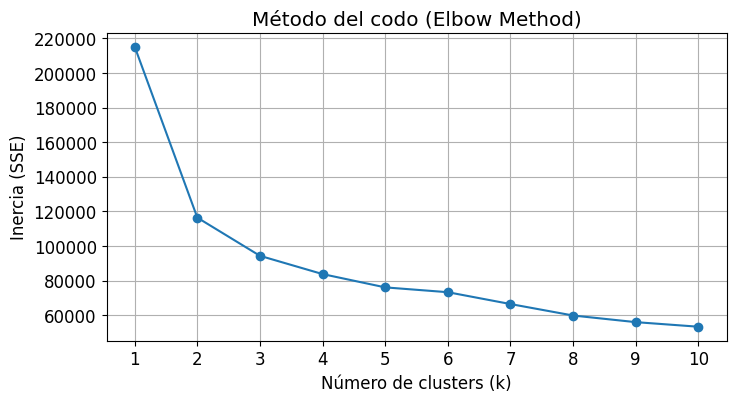

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluar para k de 1 a 10
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker='o')
plt.title('Método del codo (Elbow Method)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.show()


También se incluye el coeficiente de silueta, que evalúa la separación y cohesión de los grupos. Los valores cercanos a 1 serían mejores. En el caso de esta gráfica, se observa que el punto más cercano a uno correspondería a dos clusters, reafirmando que sería la mejor opción para K.

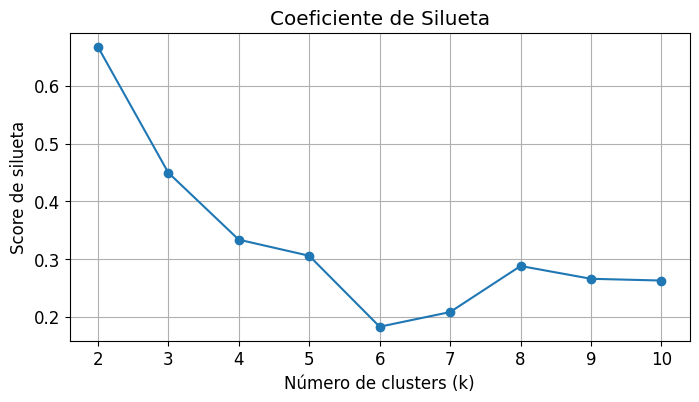

In [96]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # mínimo 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score de silueta')
plt.grid(True)
plt.show()


## Reducción de dimensionalidad

Se utilizará PCA para evaluar correlaciones y reducir la dimensionalidad, creando nuevos atributos a partir de los componentes principales.

El siguiente gráfico muestra la visualización de los datos aplicando PCA, aún sin poder diferenciar los clusters.

Varianza explicada por cada componente:
PC1: 0.5415 (54.15%)
PC2: 0.1622 (16.22%)
PC3: 0.0599 (5.99%)
PC4: 0.0592 (5.92%)
PC5: 0.0546 (5.46%)
PC6: 0.0244 (2.44%)
PC7: 0.0202 (2.02%)
PC8: 0.0151 (1.51%)
PC9: 0.0108 (1.08%)
PC10: 0.0102 (1.02%)
PC11: 0.0088 (0.88%)
PC12: 0.0079 (0.79%)
PC13: 0.0070 (0.70%)
PC14: 0.0056 (0.56%)
PC15: 0.0036 (0.36%)
PC16: 0.0023 (0.23%)
PC17: 0.0020 (0.20%)
PC18: 0.0017 (0.17%)
PC19: 0.0014 (0.14%)
PC20: 0.0009 (0.09%)
PC21: 0.0004 (0.04%)
PC22: 0.0002 (0.02%)

Cantidad de componentes necesarias para acumular al menos 85% de varianza: 5

Varianza acumulada total: 1.0000 (100.00%)


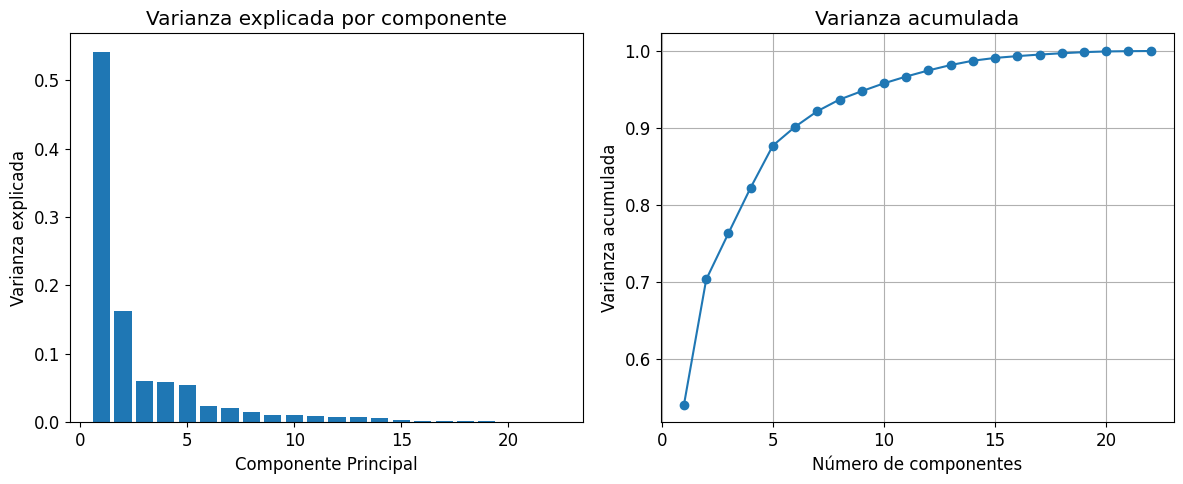

In [97]:
from sklearn.decomposition import PCA
pca_0 = PCA()
X_pca_full = pca_0.fit_transform(scaled_df)

# Mostrar la varianza explicada por cada componente
explained_variance_ratio = pca_0.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
print(f"\nCantidad de componentes necesarias para acumular al menos 85% de varianza: {n_components_85}")

print(f"\nVarianza acumulada total: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1]*100:.2f}%)")

# Gráfico de varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Varianza explicada por componente')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza explicada')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)

plt.tight_layout()
plt.show()

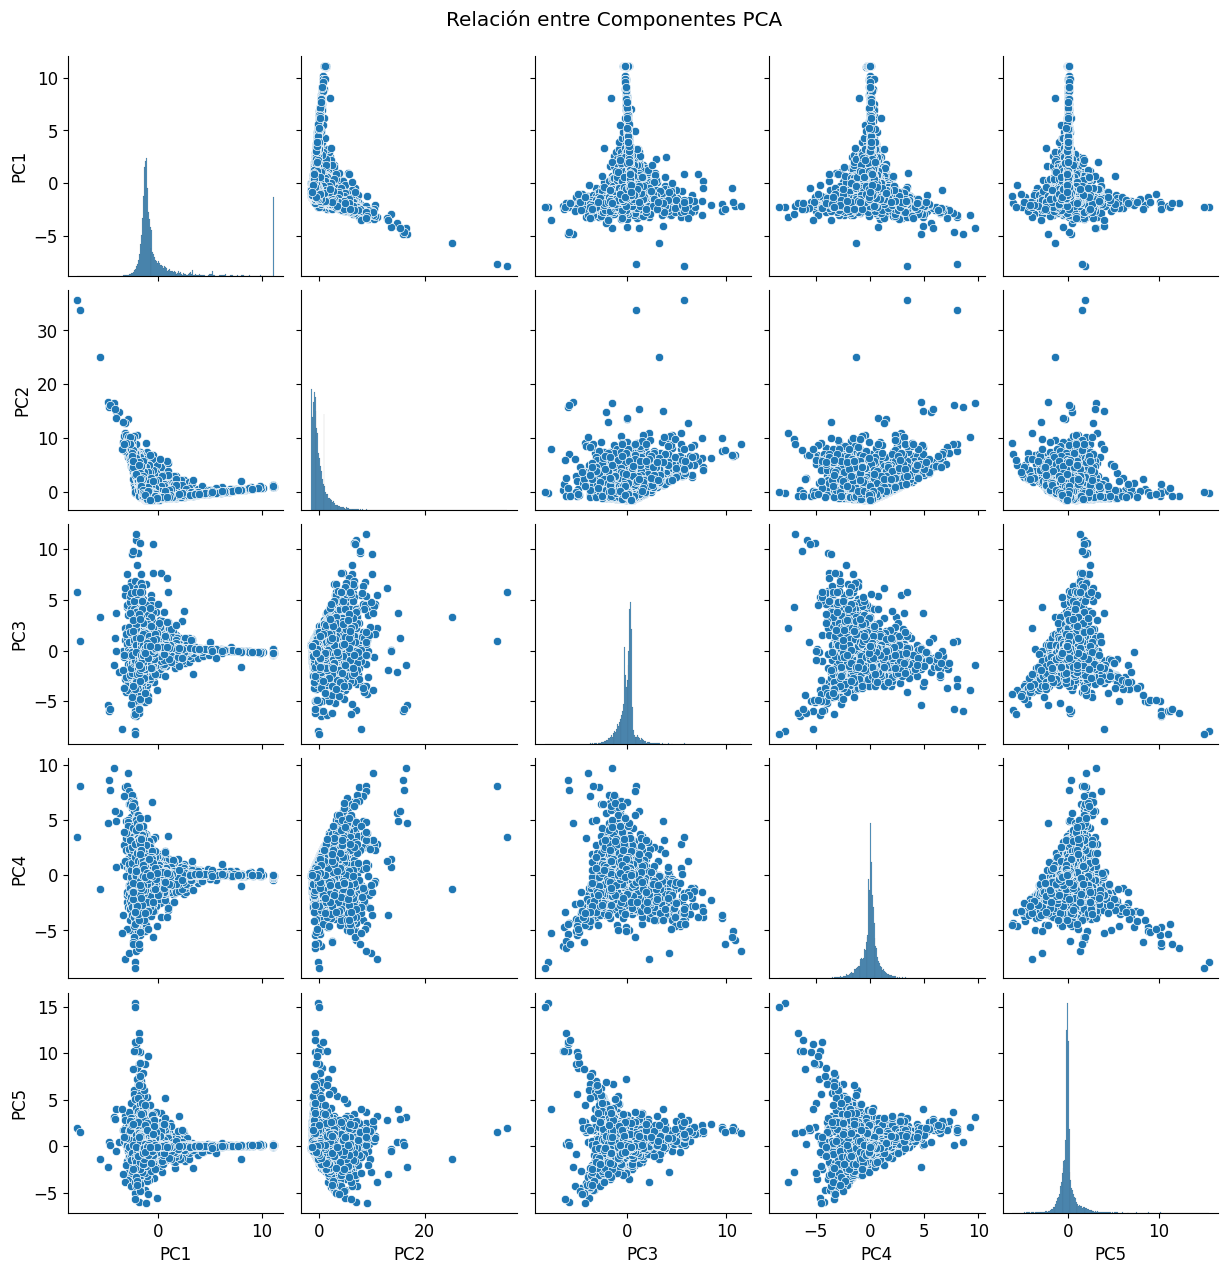

In [98]:
# Aplicar PCA para reducir a 5 componentes
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaled_df)

# Crear un DataFrame con las 5 componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

sns.pairplot(pca_df)
plt.suptitle("Relación entre Componentes PCA", y=1.02)
plt.show()


## Aplicación de algoritmos de clustering

A continuación se aplican 4 algoritmos distintos de clustering:


#### K-means

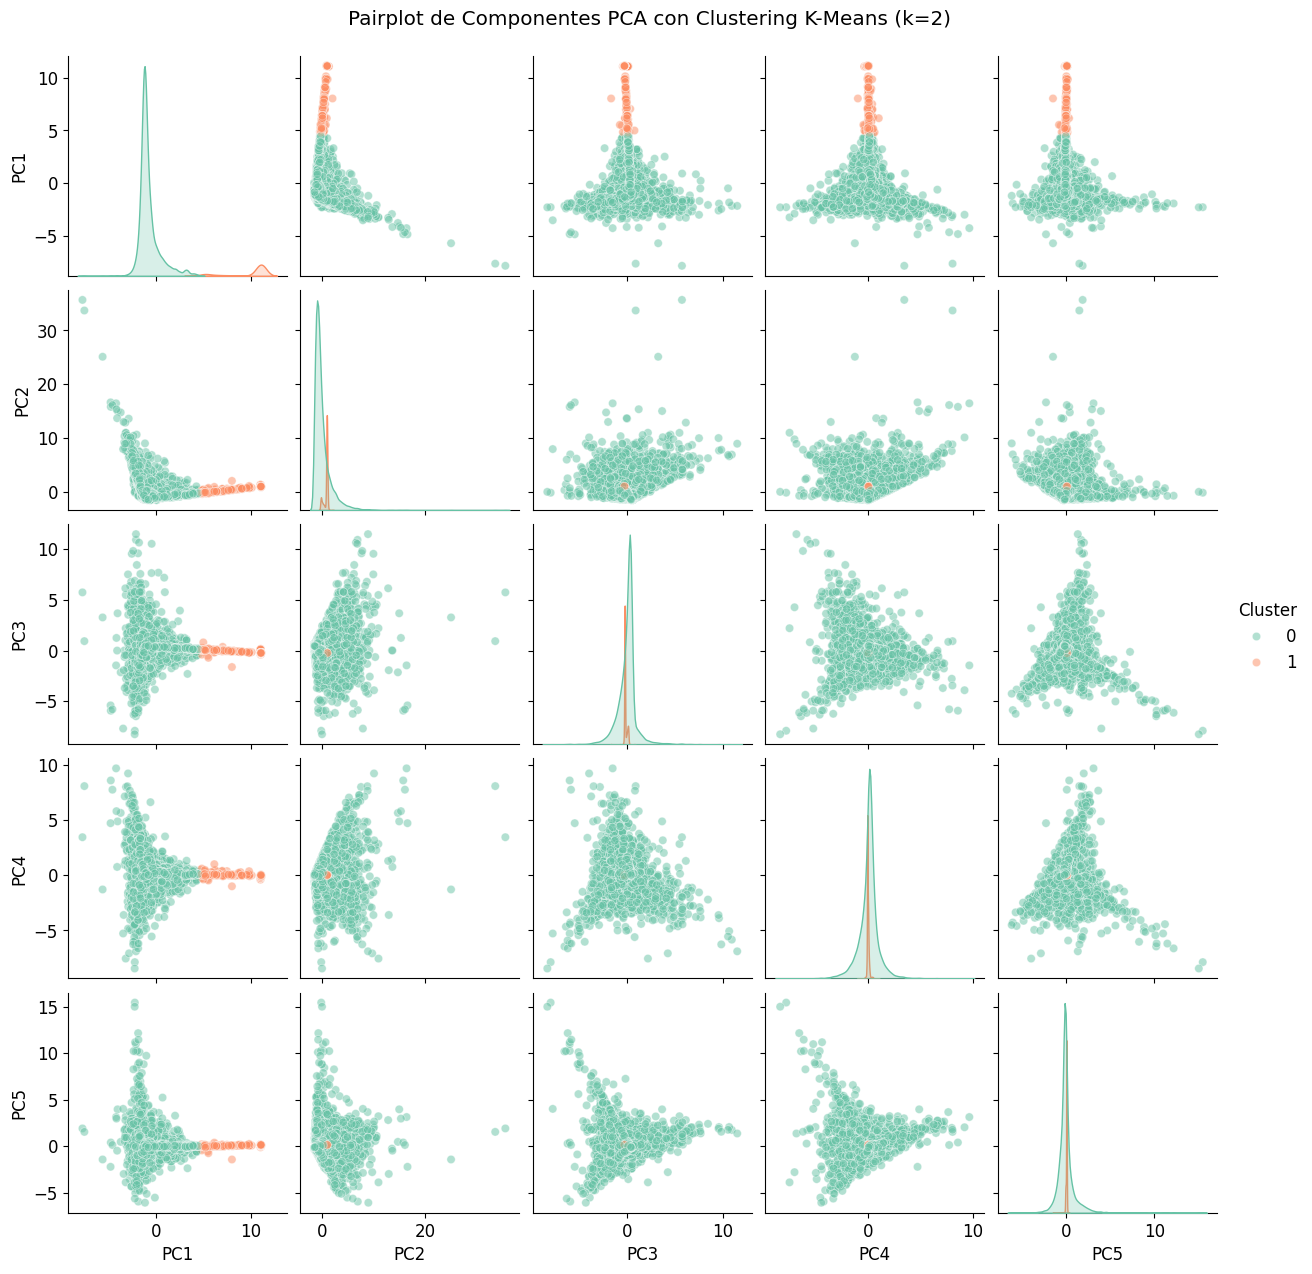

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Asegurarse de tener los clusters como columna en el DataFrame
pca_df['Cluster'] = kmeans_labels

# Pairplot de las 4 componentes con color por cluster
sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], hue='Cluster', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot de Componentes PCA con Clustering K-Means (k=2)", y=1.02)
plt.show()


#### DBSCAN

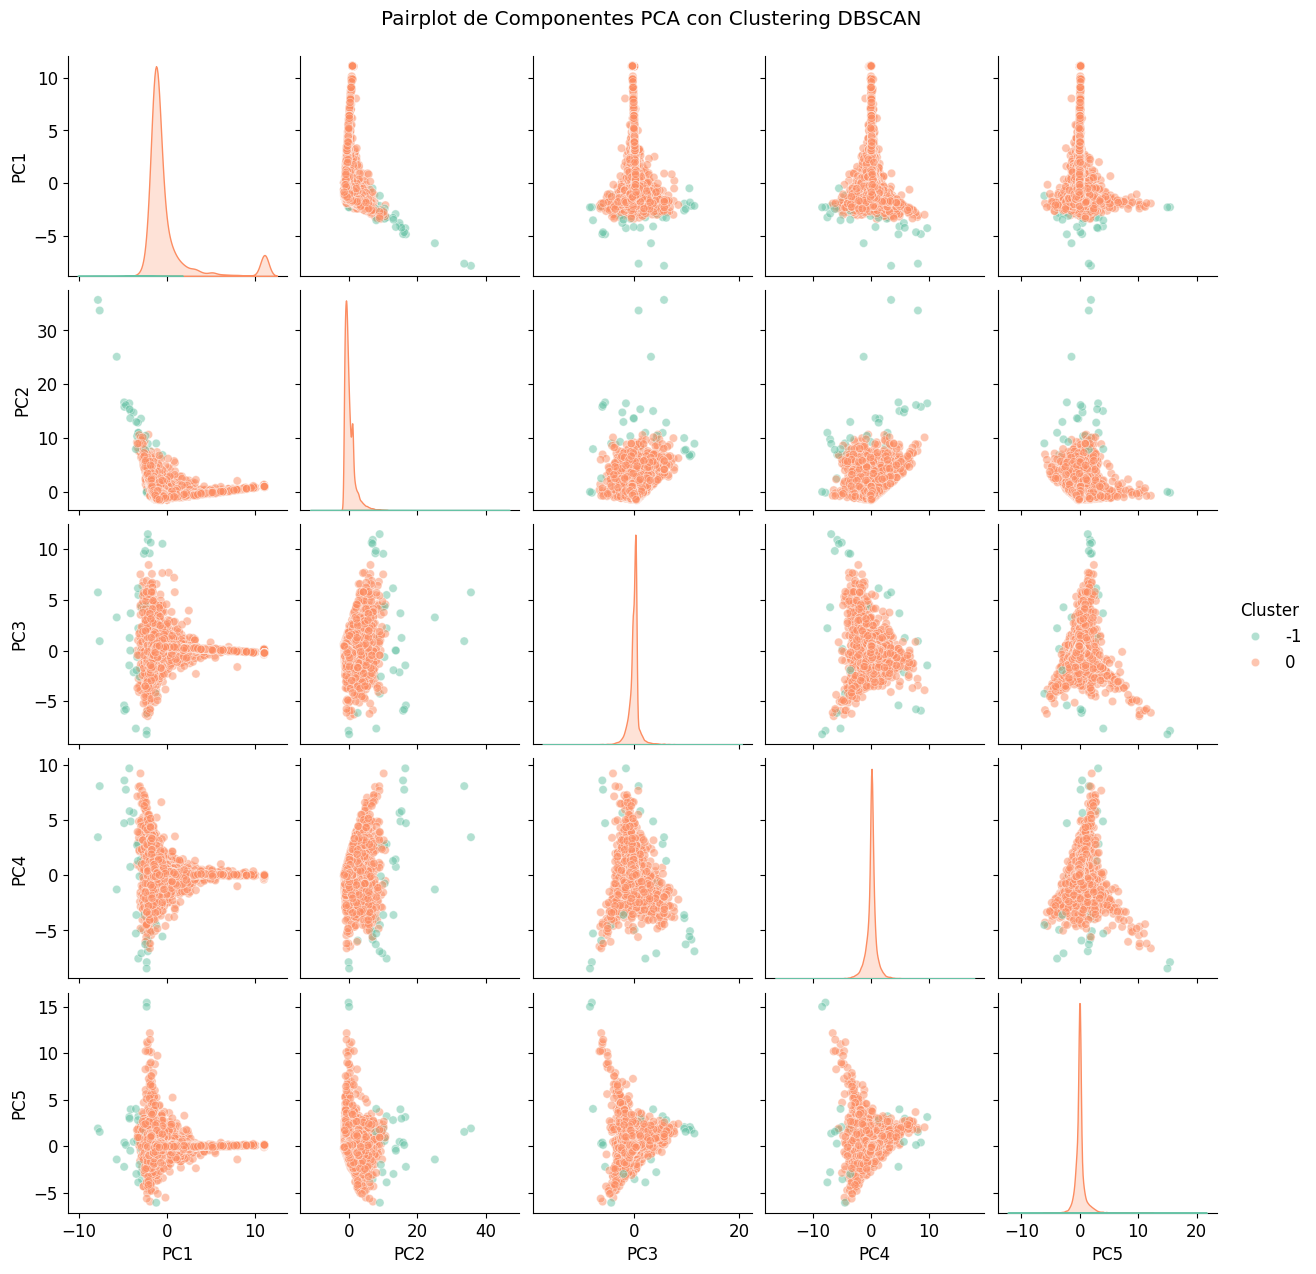

In [100]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Asegurarse de tener los clusters como columna en el DataFrame
pca_df['Cluster'] = dbscan_labels

# Pairplot de las 5 componentes con color por cluster
sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], hue='Cluster', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot de Componentes PCA con Clustering DBSCAN", y=1.02)
plt.show()


#### Clustering Jerárquico

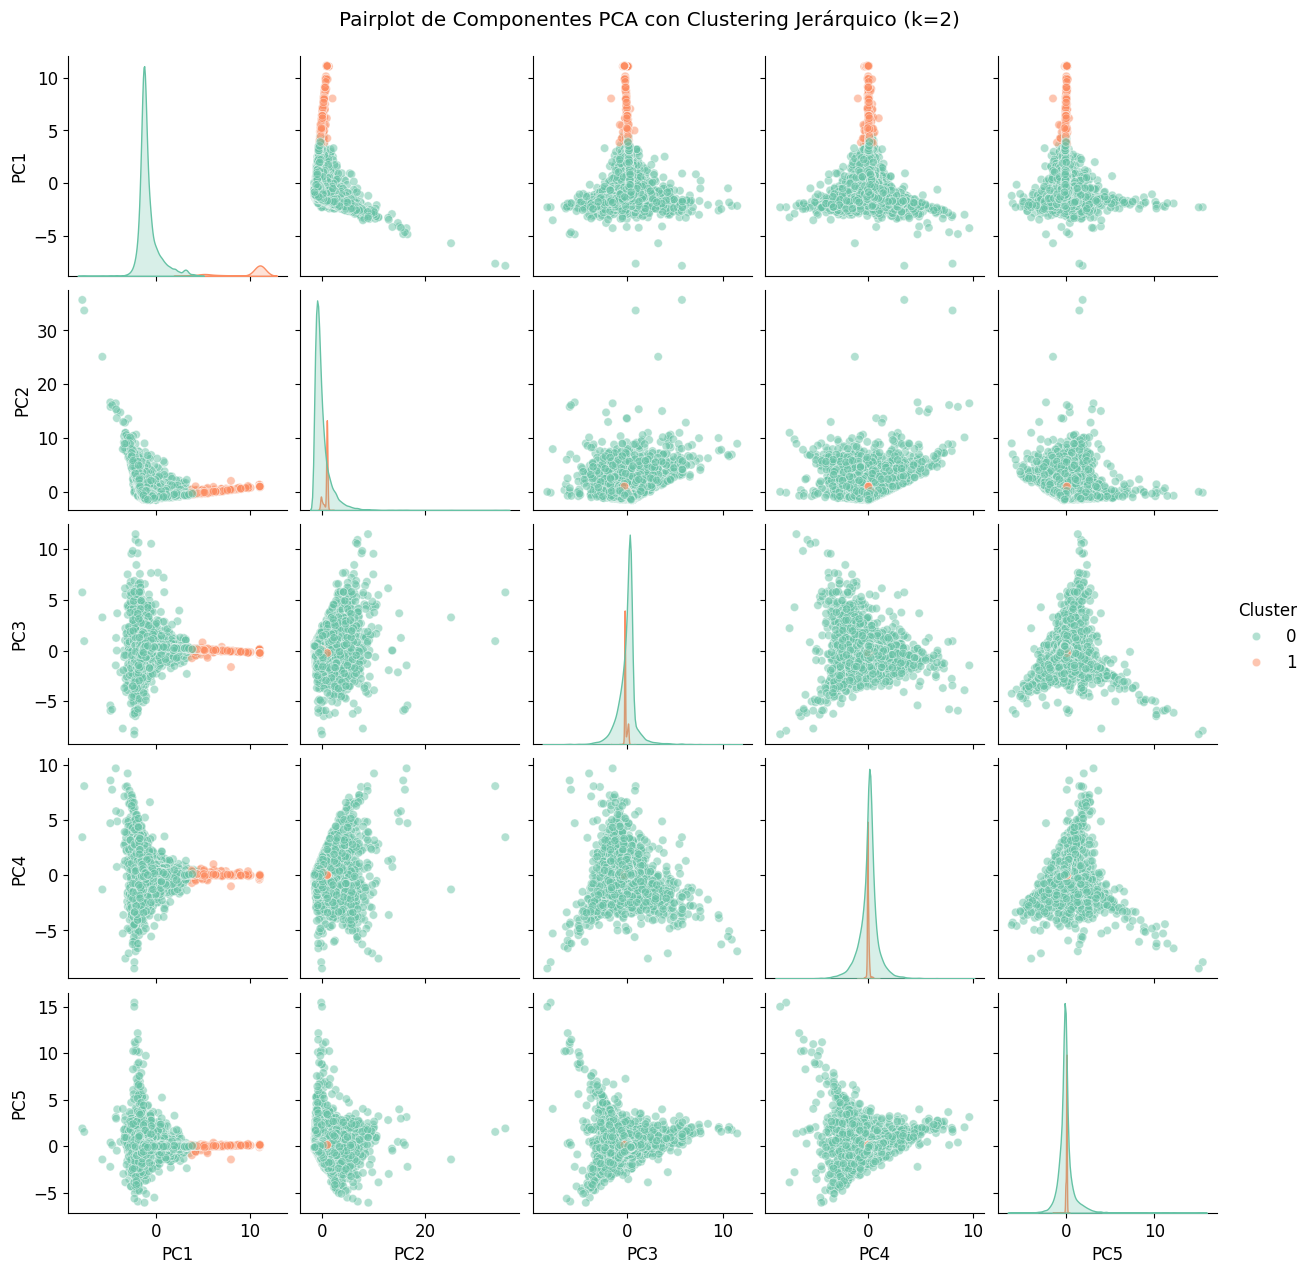

In [101]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(scaled_df)

# Asegurarse de tener los clusters como columna en el DataFrame
pca_df['Cluster'] = agglo_labels

# Pairplot de las 5 componentes con color por cluster
sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], hue='Cluster', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot de Componentes PCA con Clustering Jerárquico (k=2)", y=1.02)
plt.show()


#### Gaussian Mixture Models (GMM)

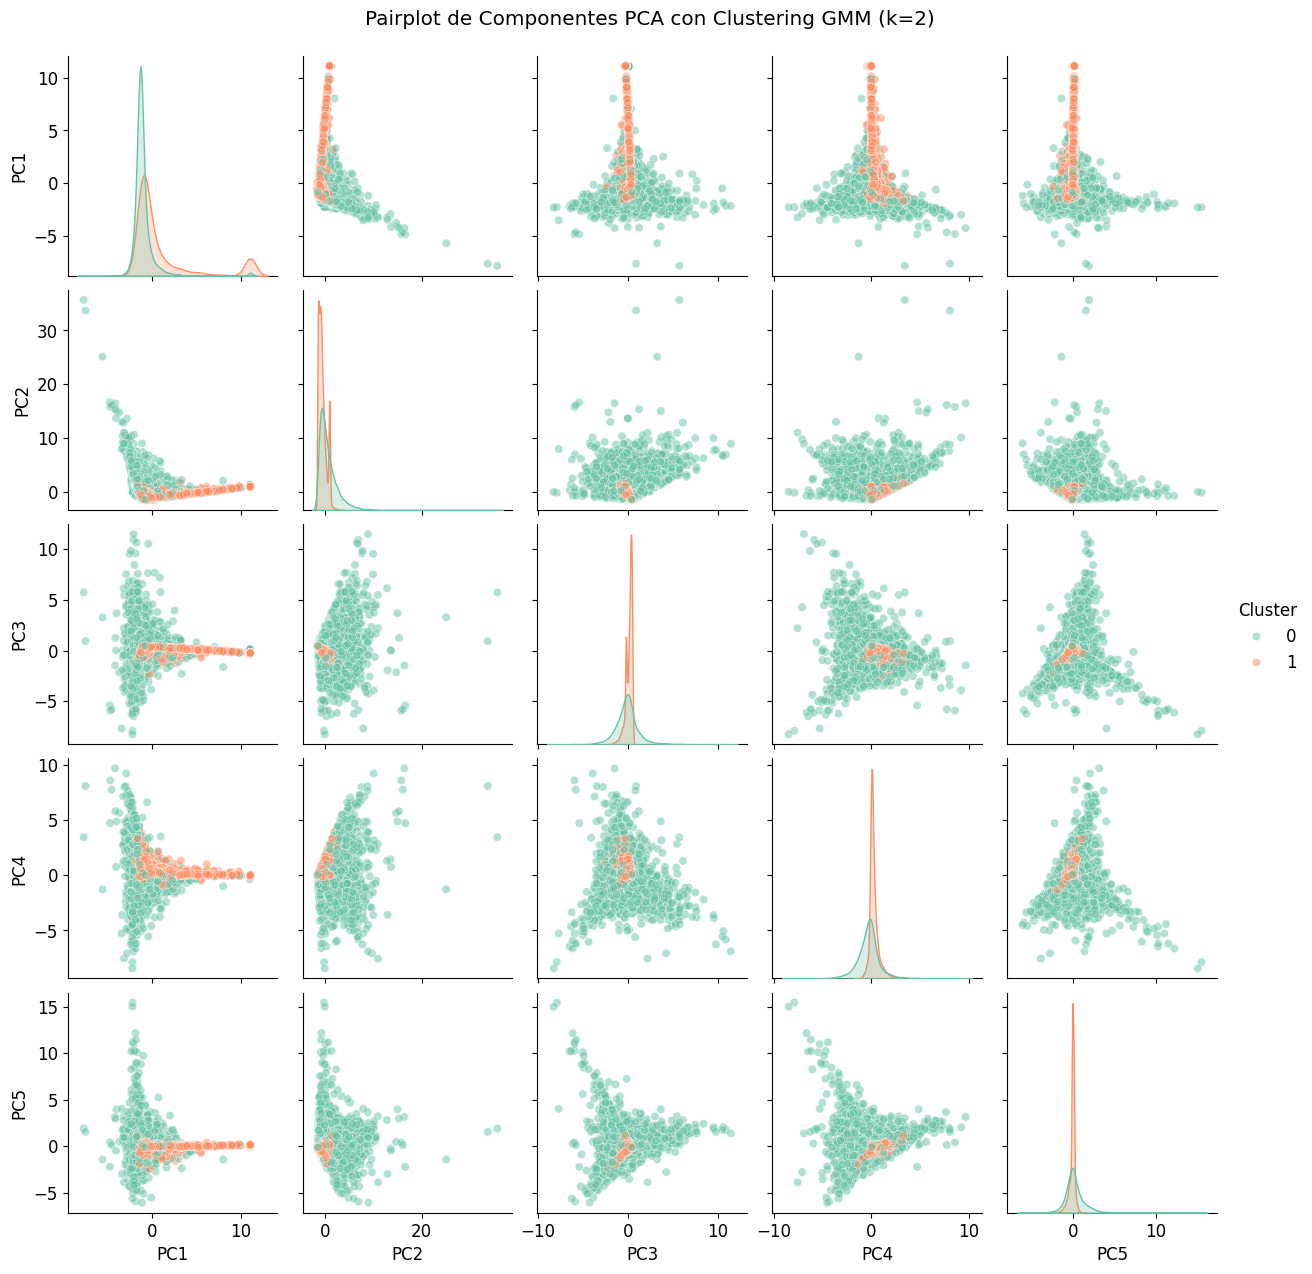

In [102]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

# Asegurarse de tener los clusters como columna en el DataFrame
pca_df['Cluster'] = gmm_labels

# Pairplot de las 5 componentes con color por cluster
sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], hue='Cluster', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot de Componentes PCA con Clustering GMM (k=2)", y=1.02)
plt.show()

# Asignación de clusters

In [103]:
# Crear DataFrame de componentes principales
cluster_df = pca_df.copy()

# Agregar etiquetas de clustering
cluster_df['KMeans'] = kmeans_labels
cluster_df['DBSCAN'] = dbscan_labels
cluster_df['Agglomerative'] = agglo_labels
cluster_df['GMM'] = gmm_labels

# Opcional: agregar índice original del DataFrame si lo necesitas
cluster_df['Index'] = df.index

Agregar clusters al dataset

In [104]:
# Añadir columnas de clustering al dataset original
df_clusters = df.copy()
df_clusters['KMeans'] = kmeans_labels
df_clusters['DBSCAN'] = dbscan_labels
df_clusters['Agglomerative'] = agglo_labels
df_clusters['GMM'] = gmm_labels


#### Visualizar clusters

In [105]:
df_clusters.groupby('KMeans').mean(numeric_only=True)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,DBSCAN,Agglomerative,GMM
KMeans,,,,,,,,,,,,,,,
0,2.498729,87.235124,0.543335,37.248678,34.081851,1287.504412,0.009432,0.031468,6.363557,0.058926,0.237578,0.166769,-0.00298,0.002454,0.488213
1,0.035909,1.146318,0.009793,0.000000,2.547334,42.990258,0.180619,0.187166,0.000000,0.092492,0.170838,0.005441,0.00000,0.998912,0.936888


In [106]:
df_clusters.groupby('DBSCAN').mean(numeric_only=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,KMeans,Agglomerative,GMM
DBSCAN,,,,,,,,,,,,,,,
-1,11.235294,965.957291,6.323529,1029.722958,245.647059,13230.036748,0.006376,0.019592,32.978594,0.035294,0.176471,0.323529,0.00000,0.000000,0.000000
0,2.290501,78.371090,0.487476,31.720404,31.139964,1161.467115,0.022235,0.043138,5.814352,0.061500,0.232759,0.154278,0.07474,0.076936,0.523097


In [107]:
df_clusters.groupby('Agglomerative').mean(numeric_only=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,KMeans,DBSCAN,GMM
Agglomerative,,,,,,,,,,,,,,,
0,2.503250,87.383781,0.544536,37.334018,34.144238,1289.936705,0.009256,0.031272,6.37865,0.059100,0.23779,0.167164,0.000088,-0.002987,0.487526
1,0.051797,1.814482,0.010571,0.036152,2.696617,49.240430,0.177859,0.185081,0.00000,0.089429,0.17019,0.005285,0.970402,0.000000,0.932347


In [108]:
df_clusters.groupby('GMM').mean(numeric_only=True)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,KMeans,DBSCAN,Agglomerative
GMM,,,,,,,,,,,,,,,
0,3.741946,139.679506,1.05273,72.065898,45.174466,1737.218286,0.008109,0.024028,12.311724,0.033944,0.257375,0.297898,0.009834,-0.005765,0.010851
1,1.006841,26.844487,0.00000,0.000000,19.404540,697.311480,0.035104,0.060536,0.000000,0.086629,0.209888,0.023476,0.133862,0.000000,0.137127


## Conclusiones

- En base a los gráficos de los resultados para GMM, se puede observar que un cluster tiende a centralizarse, mientras que el otro abarca datos más lejanos al centro.
- DBSCAN por su parte parece encontrar los datos lejanos a la nube de datos para cada par.
- La tendencia de agrupación para estos datos fue similar para k-means y para clusterización jerárquica.
- Existe la posibilidad de encontrar tendencias entre los clientes en base a su etiqueta según los modelos. Un uso potencial de esta clasificación a futuro puede ser la predicción de si un cliente va a comprar o no, comparando la validez de tal predicción con el valor de la etiqueta `Revenue`.
